# This is the code for feature extraction, matching and pose estimation using OpenCV

In [32]:
# !pip3 uninstall opencv-python
!pip install opencv-contrib-python

# ORB Feature Extractor 

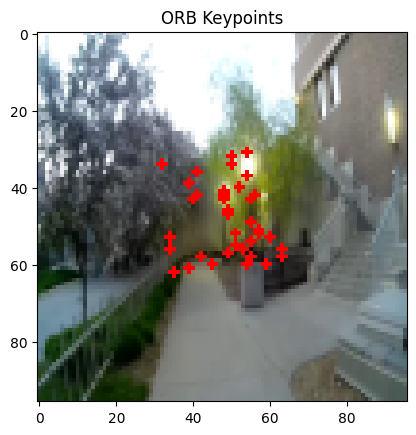

In [1]:
import cv2
import matplotlib.pyplot as plt

def main():
    # Load the image
    image_path = "data_set/ego4d_images/0473ae1a-a1bf-486b-97a1-30a395bad8dc/0473_0.png"  # specify your image path here
    img = cv2.imread(image_path)

    if img is None:
        print("Error: Image not found")
        return

    # Convert to grayscale as ORB works with grayscale images
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Initialize ORB object
    orb = cv2.ORB_create()

    # Check if ORB is available in your version of OpenCV
    if orb is None:
        print("ORB not available in this OpenCV version.")
        return

    # Find keypoints and descriptors with ORB
    keypoints, descriptors = orb.detectAndCompute(gray_img, None)

    # Draw keypoints on the original image (output image will be in color)
    # img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, (255,0,0), 4)

    for keypoint in keypoints:
        img = cv2.circle(img, (int(keypoint.pt[0]), int(keypoint.pt[1])), radius=1, color=(0, 0, 255), thickness=-1)

    # Display the image with detected keypoints
    # plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('ORB Keypoints')
    plt.show()

if __name__ == "__main__":
    main()


# SIFT Feature Extractor

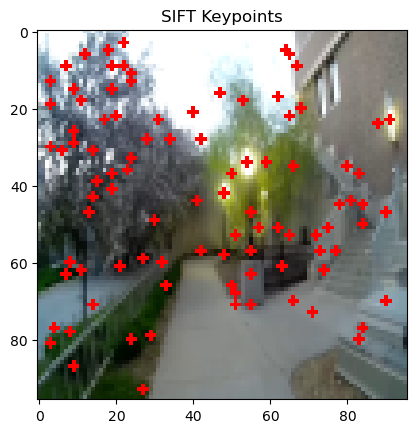

In [34]:
import cv2
import matplotlib.pyplot as plt

def main():
    # Load the image
    image_path = "data_set/ego4d_images/0473ae1a-a1bf-486b-97a1-30a395bad8dc/0473_0.png"  # specify your image path here
    img = cv2.imread(image_path)

    if img is None:
        print("Error: Image not found")
        return

    # Convert to grayscale (SIFT works with grayscale images)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Initialize SIFT object
    sift = cv2.SIFT_create()

    # Find keypoints and descriptors with SIFT
    keypoints, descriptors = sift.detectAndCompute(gray_img, None)

    # Draw keypoints on the original image (output image will be in color)
    # img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, (255,0,0), 4)

    # Draw red dots on each keypoint location
    for keypoint in keypoints:
        img = cv2.circle(img, (int(keypoint.pt[0]), int(keypoint.pt[1])), radius=1, color=(0, 0, 255), thickness=-1)


    # Display the image with detected keypoints
    # plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('SIFT Keypoints')
    plt.show()

if __name__ == "__main__":
    main()


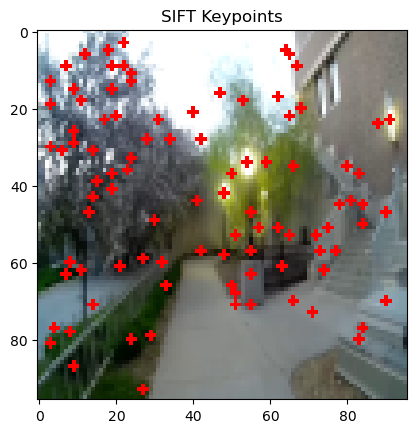

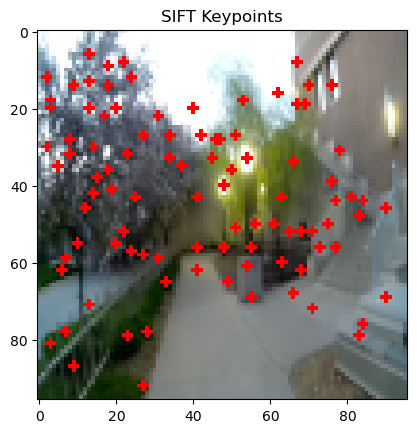

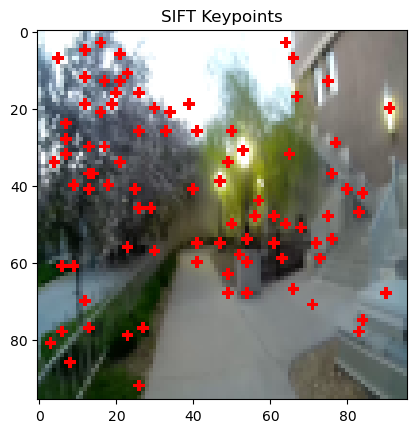

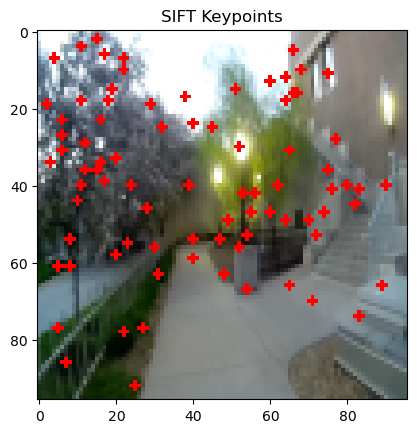

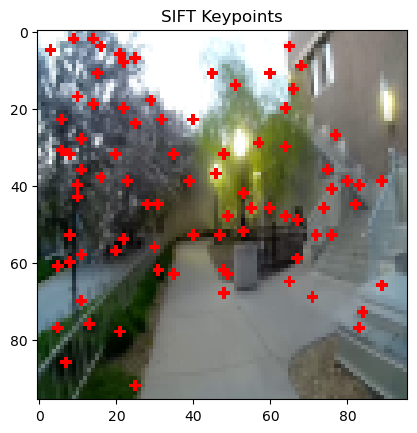

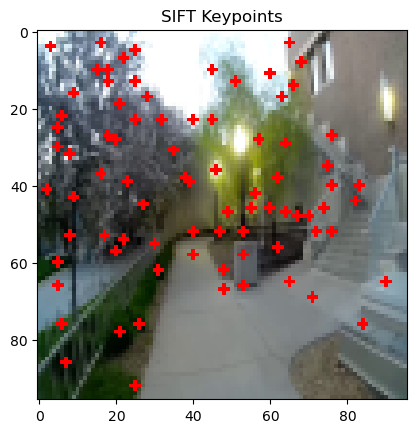

In [35]:
import cv2
import matplotlib.pyplot as plt
import os

def process_image(image_path):
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Image not found at {image_path}")
        return

    # Convert to grayscale (SIFT works with grayscale images)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Initialize SIFT object
    sift = cv2.SIFT_create()

    # Find keypoints and descriptors with SIFT
    keypoints, descriptors = sift.detectAndCompute(gray_img, None)

    # Draw red dots on each keypoint location
    for keypoint in keypoints:
        img = cv2.circle(img, (int(keypoint.pt[0]), int(keypoint.pt[1])), radius=1, color=(0, 0, 255), thickness=-1)

    # Display the image with detected keypoints
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('SIFT Keypoints')
    plt.show()

def main():
    base_folder = "data_set/ego4d_images/0473ae1a-a1bf-486b-97a1-30a395bad8dc"
    file_prefix = "0473_"
    file_extension = ".png"

    # Loop through the first 6 images
    for i in range(6):
        image_filename = f"{file_prefix}{i}{file_extension}"
        image_path = os.path.join(base_folder, image_filename)
        
        if os.path.exists(image_path):
            process_image(image_path)
        else:
            print(f"File does not exist: {image_path}")

if __name__ == "__main__":
    main()


# Feature matching between the adjectent images: 

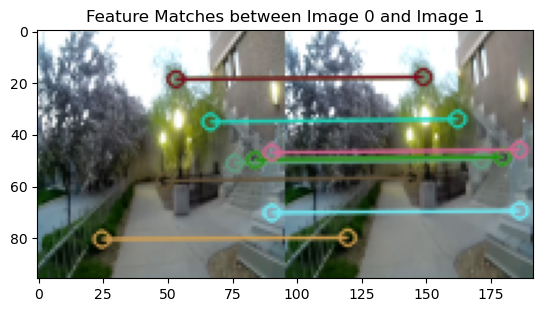

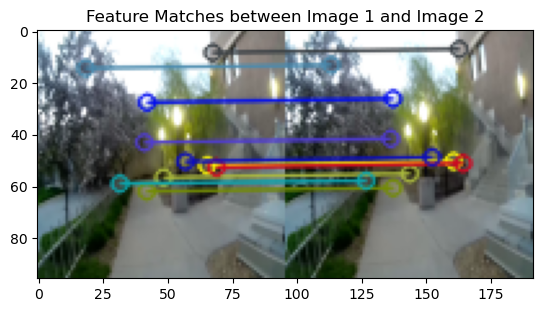

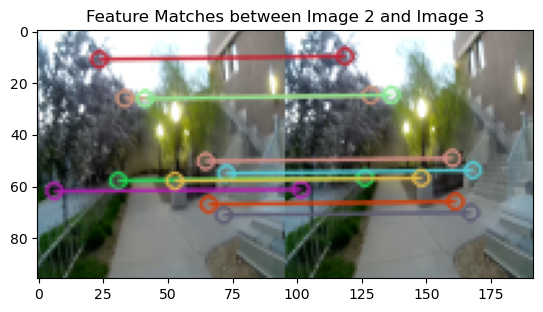

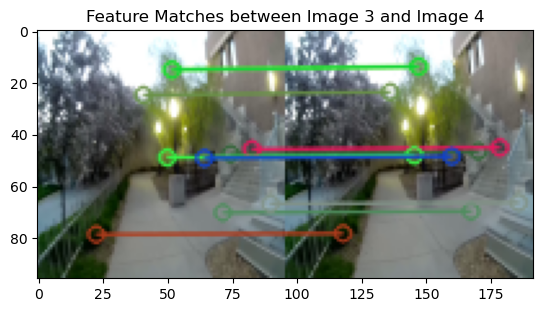

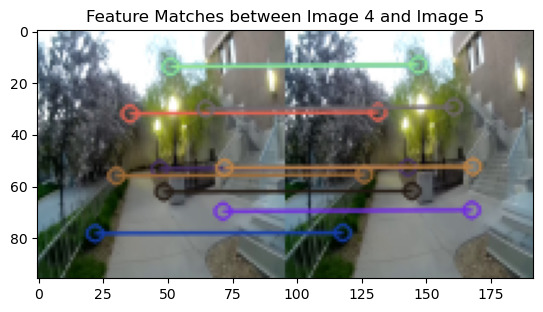

In [36]:
import cv2
import matplotlib.pyplot as plt
import os

def feature_match(img1, img2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Find keypoints and descriptors with SIFT
    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

    # Create BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

    # Match descriptors
    matches = bf.match(descriptors1, descriptors2)

    # Sort them in ascending order of their distances so that best matches (with low distance) come to front
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw first 10 matches
    img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return img_matches

def main():
    base_folder = "data_set/ego4d_images/0473ae1a-a1bf-486b-97a1-30a395bad8dc"
    file_prefix = "0473_"
    file_extension = ".png"

    images = []

    # Load the first 6 images
    for i in range(6):
        image_filename = f"{file_prefix}{i}{file_extension}"
        image_path = os.path.join(base_folder, image_filename)
        
        if os.path.exists(image_path):
            img = cv2.imread(image_path)
            if img is not None:
                images.append(img)
            else:
                print(f"Error loading image: {image_path}")
        else:
            print(f"File does not exist: {image_path}")

    # Perform feature matching between sequential images
    for i in range(len(images) - 1):
        img_matches = feature_match(images[i], images[i + 1])

        # Show the matches
        plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
        plt.title(f'Feature Matches between Image {i} and Image {i+1}')
        plt.show()

if __name__ == "__main__":
    main()


# Modifed to extract and match more features: 

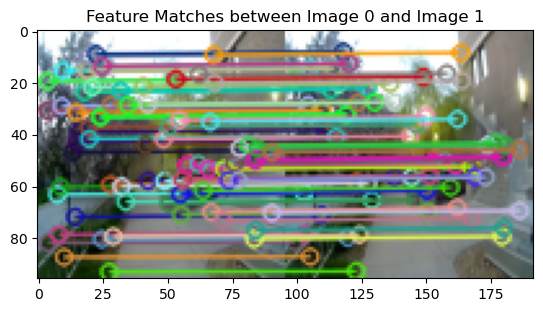

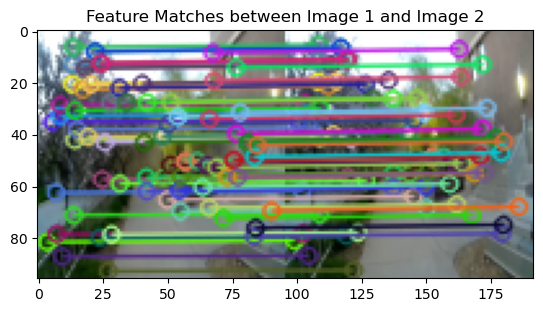

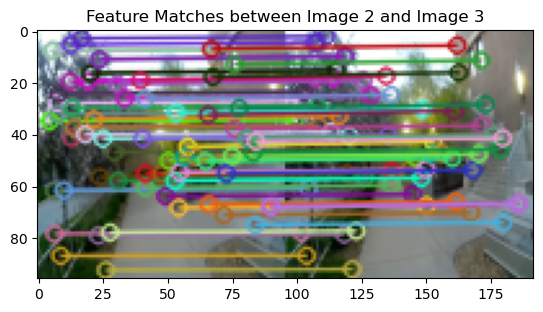

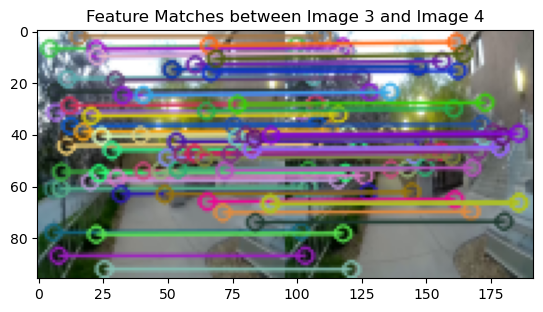

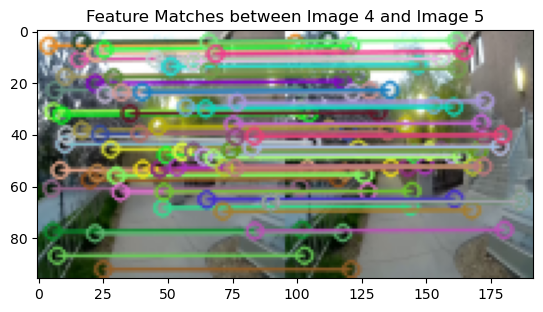

In [37]:
import cv2
import matplotlib.pyplot as plt
import os

def feature_match(img1, img2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Find keypoints and descriptors with SIFT
    keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

    # FLANN parameters
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)  # specify the number of times the trees in the index should be recursively traversed

    # Create FLANN matcher object
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # Match descriptors using FLANN
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # Apply ratio test to get good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # Draw good matches
    img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    return img_matches

def main():
    base_folder = "data_set/ego4d_images/0473ae1a-a1bf-486b-97a1-30a395bad8dc"
    file_prefix = "0473_"
    file_extension = ".png"

    images = []

    # Load the first 6 images
    for i in range(6):
        image_filename = f"{file_prefix}{i}{file_extension}"
        image_path = os.path.join(base_folder, image_filename)
        
        if os.path.exists(image_path):
            img = cv2.imread(image_path)
            if img is not None:
                images.append(img)
            else:
                print(f"Error loading image: {image_path}")
        else:
            print(f"File does not exist: {image_path}")

    # Perform feature matching between sequential images
    for i in range(len(images) - 1):
        img_matches = feature_match(images[i], images[i + 1])

        # Show the matches
        plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
        plt.title(f'Feature Matches between Image {i} and Image {i+1}')
        plt.show()

if __name__ == "__main__":
    main()


# Camera Intrinstic Matrix Calibration Process 

In [38]:
# import numpy as np
# import cv2
# import glob

# # Prepare object points like (0,0,0), (1,0,0), (2,0,0), ..., (6,5,0)
# objp = np.zeros((6*7,3), np.float32)
# objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# # Arrays to store object points and image points from all the images
# objpoints = [] # 3d points in real world space
# imgpoints = [] # 2d points in image plane

# # List of calibration images
# images = glob.glob('path/to/calibration/images/*.jpg') # to be collected here 

# for fname in images:
#     img = cv2.imread(fname)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     # Find the chessboard corners
#     ret, corners = cv2.findChessboardCorners(gray, (7,6), None)

#     # If found, add object points, image points
#     if ret == True:
#         objpoints.append(objp)
#         imgpoints.append(corners)

#         # Draw and display the corners
#         cv2.drawChessboardCorners(img, (7,6), corners, ret)
#         cv2.imshow('img', img)
#         cv2.waitKey(500)

# cv2.destroyAllWindows()

# # Calibration
# ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# # mtx contains the camera matrix
# print("Camera Matrix: ")
# print(mtx)

# # Save the camera matrix for later use
# np.save('camera_matrix.npy', mtx)


# Below is an assumed camera intrinstic matrix for easier process:

In [39]:
import math

# Image dimensions
width = 1920
height = 1080

# Assume a moderate horizontal field of view
fov_degrees = 60
fov_radians = math.radians(fov_degrees)

# Estimate the focal length based on the assumed FOV
f = (width / 2) / math.tan(fov_radians / 2)

# Construct the intrinsic camera matrix
K = [[f, 0, width / 2],
     [0, f, height / 2],
     [0, 0, 1]]

print("Estimated intrinsic camera matrix: ")
print(K)


Estimated intrinsic camera matrix: 
[[1662.7687752661227, 0, 960.0], [0, 1662.7687752661227, 540.0], [0, 0, 1]]


In [4]:
import cv2
import numpy as np
import os

# def estimate_motion(matched_features, K):
#     # Unpack keypoints and descriptors
#     keypoints1, keypoints2, good_matches = matched_features

#     # Extract location of good matches
#     points1 = np.zeros((len(good_matches), 2), dtype=np.float32)
#     points2 = np.zeros((len(good_matches), 2), dtype=np.float32)

#     for i, match in enumerate(good_matches):
#         points1[i, :] = keypoints1[match.queryIdx].pt
#         points2[i, :] = keypoints2[match.trainIdx].pt

#     # Compute the essential matrix
#     E, mask = cv2.findEssentialMat(points1, points2, K, method=cv2.RANSAC, prob=0.999, threshold=1.0)
#     points, R, t, mask = cv2.recoverPose(E, points1, points2, K)

#     return R, t


# def estimate_motion(matched_features, K):
#     # Unpack keypoints and descriptors
#     keypoints1, keypoints2, good_matches = matched_features

#     # Extract location of good matches
#     points1 = np.zeros((len(good_matches), 2), dtype=np.float32)
#     points2 = np.zeros((len(good_matches), 2), dtype=np.float32)

#     for i, match in enumerate(good_matches):
#         points1[i, :] = keypoints1[match.queryIdx].pt
#         points2[i, :] = keypoints2[match.trainIdx].pt

#     # Ensure arrays are continuous
#     points1 = np.copy(points1)
#     points2 = np.copy(points2)

#     # Compute the essential matrix
#     E, mask = cv2.findEssentialMat(points1, points2, K, method=cv2.RANSAC, prob=0.999, threshold=1.0)
#     points, R, t, mask = cv2.recoverPose(E, points1, points2, K)

#     return R, t


def estimate_motion(matched_features, K):
    # Unpack keypoints and descriptors
    keypoints1, keypoints2, good_matches = matched_features

    # Extract location of good matches
    points1 = np.zeros((len(good_matches), 2), dtype=np.float32)
    points2 = np.zeros((len(good_matches), 2), dtype=np.float32)

    for i, match in enumerate(good_matches):
        points1[i, :] = keypoints1[match.queryIdx].pt
        points2[i, :] = keypoints2[match.trainIdx].pt

    # Reshape points to ensure they are 2-dimensional (NumPy should ensure they are continuous)
    points1 = points1.reshape(-1, 2)
    points2 = points2.reshape(-1, 2)

    # Compute the essential matrix
    E, mask = cv2.findEssentialMat(points1, points2, K, method=cv2.RANSAC, prob=0.999, threshold=1.0)
    
    inlier_pts1 = points1[mask.ravel() == 1]
    inlier_pts2 = points2[mask.ravel() == 1]

    # Recover the pose using the inlier matches
    _, R, t, _ = cv2.recoverPose(E, inlier_pts1, inlier_pts2, K)
    return R, t



# Below is the code used to sort out the images filenames 

In [5]:
import os
import re

def numerical_sort_key(filename):
    # Extract the number from the filename using regex
    numbers = re.findall(r'\d+', filename)
    # The key is a tuple of integers found in the filename
    return tuple(int(num) for num in numbers)

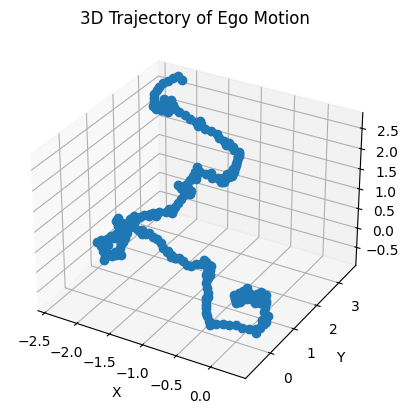

In [6]:

# Define the intrinsic matrix values
f = 1.0  # Focal length
width = 1.0  # Image width
height = 1.0  # Image height
K = np.array([[f, 0, width / 2],
            [0, f, height / 2],
            [0, 0, 1]], dtype=float)

# Define the path to your image folder
folder_path = "data_set/ego4d_images/f178b211-e532-47ef-8b2b-28a7fa4c8e0f"

# Get list of files in directory
images = os.listdir(folder_path)

# Sort the filenames using the defined key
images = sorted(images, key=numerical_sort_key)

if len(images) < 2:
    print("Not enough images to estimate motion")
    # return

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Variables for trajectory
trajectory = [np.array([0, 0, 0], dtype=np.float64)]  # Ensure it's a float array
current_pos = np.array([0, 0, 0], dtype=np.float64)   # Ensure it's a float array
current_rot = np.eye(3, dtype=np.float64)             # Ensure it's a float array


# Load the first image and find its keypoints and descriptors
first_image_path = os.path.join(folder_path, images[0])  # get the first image
old_image = cv2.imread(first_image_path, cv2.IMREAD_GRAYSCALE)

if old_image is None:
    print(f"Error loading image {images[0]}")
    # return

old_keypoints, old_descriptors = sift.detectAndCompute(old_image, None)

for i in range(1, len(images)):
    # Load the next image
    new_image_path = os.path.join(folder_path, images[i])
    new_image = cv2.imread(new_image_path, cv2.IMREAD_GRAYSCALE)

    if new_image is None:
        print(f"Error loading image {images[i]}")
        continue

    # Compute keypoints and descriptors
    new_keypoints, new_descriptors = sift.detectAndCompute(new_image, None)

    # Matcher
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(old_descriptors, new_descriptors, k=2)

    # Apply ratio test
    good = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good.append(m)

    if len(good) > 10:
        # Estimate motion
        R, t = estimate_motion((old_keypoints, new_keypoints, good), K)

        # Update current position and orientation
        current_pos += current_rot.dot(t.ravel()) * 0.1  # scale translation by elapsed time
        current_rot = R.dot(current_rot)

        # Add the current position to the trajectory
        trajectory.append(current_pos.copy())

    else:
        print(f"Not enough good matches between {images[i-1]} and {images[i]}")

    # Current becomes old
    old_image, old_keypoints, old_descriptors = new_image, new_keypoints, new_descriptors

# Plotting
trajectory = np.array(trajectory)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], 'o-')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Trajectory of Ego Motion')
plt.show()


# Below is taking video as the input file:

Total number of frames extracted: 484
Error reading first frame
Processing frame 1...
Processing frame 2...
Processing frame 3...
Processing frame 4...
Processing frame 5...
Processing frame 6...
Processing frame 7...
Processing frame 8...
Processing frame 9...
Processing frame 10...
Processing frame 11...
Processing frame 12...
Processing frame 13...
Processing frame 14...
Processing frame 15...
Processing frame 16...
Processing frame 17...
Processing frame 18...
Processing frame 19...
Processing frame 20...
Processing frame 21...
Processing frame 22...
Processing frame 23...
Processing frame 24...
Processing frame 25...
Processing frame 26...
Processing frame 27...
Processing frame 28...
Processing frame 29...
Processing frame 30...
Processing frame 31...
Processing frame 32...
Processing frame 33...
Processing frame 34...
Processing frame 35...
Processing frame 36...
Processing frame 37...
Processing frame 38...
Processing frame 39...
Processing frame 40...
Processing frame 41...
Pr

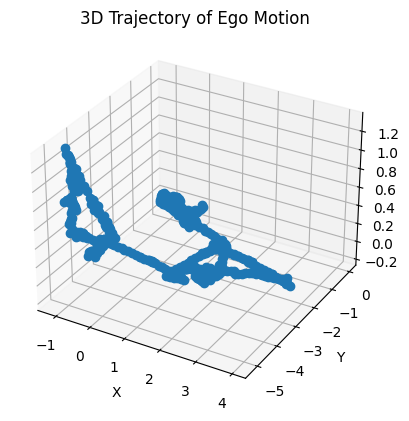

In [10]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the intrinsic matrix values
f = 1.0  # Focal length
width = 1.0  # Image width
height = 1.0  # Image height
K = np.array([[f, 0, width / 2],
            [0, f, height / 2],
            [0, 0, 1]], dtype=float)

# Define the path to your video file
video_path = "data_set/my_dataset/videos/ego_motion_test.mp4"

############################################################
# Open the video file
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error opening video file")
    # Optionally, you can return from the function or exit the script here

# Initialize a list to store the frames
images = []

# Read the video frame by frame
while True:
    ret, frame = cap.read()
    if not ret:
        break  # Break the loop if there are no more frames

    images.append(frame)

# Release the video capture object
cap.release()

# Now, 'images' contains all the frames from the video
print(f"Total number of frames extracted: {len(images)}")
############################################################

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Variables for trajectory
trajectory = [np.array([0, 0, 0], dtype=np.float64)]  # Ensure it's a float array
current_pos = np.array([0, 0, 0], dtype=np.float64)   # Ensure it's a float array
current_rot = np.eye(3, dtype=np.float64)             # Ensure it's a float array

# Read the first frame
old_frame = images[0]
if not ret:
    print("Error reading first frame")
    # return

old_image = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
old_keypoints, old_descriptors = sift.detectAndCompute(old_image, None)

for i in range(len(images) - 1):
    # Read the next frame
    new_frame = images[i + 1]

    print(f"Processing frame {i + 1}...")

    new_image = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)

    # Compute keypoints and descriptors
    new_keypoints, new_descriptors = sift.detectAndCompute(new_image, None)

    # Matcher
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(old_descriptors, new_descriptors, k=2)

    # Apply ratio test and keep a maximum of 20 matches
    good = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance and len(good) < 20:
            good.append(m)


    if len(good) > 10:
        # Estimate motion
        R, t = estimate_motion((old_keypoints, new_keypoints, good), K)

        # Update current position and orientation
        current_pos += current_rot.dot(t.ravel()) * 0.1  # scale translation by elapsed time
        current_rot = R.dot(current_rot)

        # Add the current position to the trajectory
        trajectory.append(current_pos.copy())

    else:
        print("Not enough good matches")

    # Current becomes old
    old_image, old_keypoints, old_descriptors = new_image, new_keypoints, new_descriptors


# Plotting
trajectory = np.array(trajectory)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], 'o-')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Trajectory of Ego Motion')
plt.show()


# Here is the code that try to correct the drift above:

Total number of frames extracted: 484


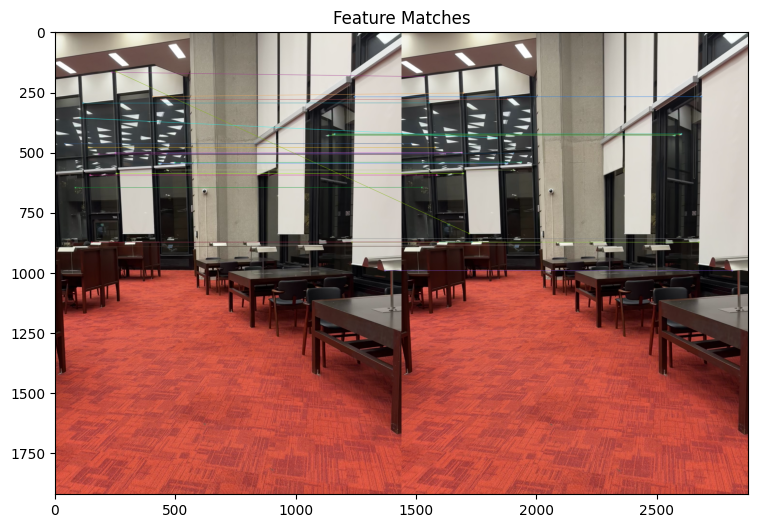

In [22]:
import cv2
import matplotlib.pyplot as plt

# Assuming you have two frames: frame1 and frame2
# For example, frame1 = cv2.imread('path_to_frame1.jpg')
# frame2 = cv2.imread('path_to_frame2.jpg')

# Define the path to your video file
video_path = "data_set/my_dataset/videos/ego_motion_test.mp4"

############################################################
# Open the video file
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error opening video file")
    # Optionally, you can return from the function or exit the script here

# Initialize a list to store the frames
images = []

# Read the video frame by frame
while True:
    ret, frame = cap.read()
    if not ret:
        break  # Break the loop if there are no more frames

    images.append(frame)

# Release the video capture object
cap.release()

# Now, 'images' contains all the frames from the video
print(f"Total number of frames extracted: {len(images)}")
############################################################

frame1 = images[0]
frame2 = images[1]  # assuming you have two frames

# Initialize ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB in each frame
keypoints1, descriptors1 = orb.detectAndCompute(frame1, None)
keypoints2, descriptors2 = orb.detectAndCompute(frame2, None)

# Sort keypoints by their size (or Harris response)
keypoints = sorted(keypoints1, key=lambda x: -x.size)
keypoints = sorted(keypoints2, key=lambda x: -x.size)

# Select the top 20 keypoints
keypoints1 = keypoints1[:50]
keypoints2 = keypoints2[:50]
descriptors1 = descriptors1[:50]
descriptors2 = descriptors2[:50]

# Create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort matches in the order of their distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw the first 10 matches
img_matches = cv2.drawMatches(frame1, keypoints1, frame2, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Convert BGR to RGB for matplotlib display
img_matches = cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB)

# Visualize the matches
plt.figure(figsize=(12, 6))
plt.imshow(img_matches)
plt.title('Feature Matches')
plt.show()


# Below is how to find the transform between the two frames 

In [27]:
import cv2
import numpy as np
import math 

# Initialize ORB detector
orb = cv2.ORB_create()

# Assuming frame1 and frame2 are your two sequential frames
frame1 = images[0]
frame2 = images[1]

# Find keypoints and descriptors
keypoints1, descriptors1 = orb.detectAndCompute(frame1, None)
keypoints2, descriptors2 = orb.detectAndCompute(frame2, None)

# Match descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

# Extract matched keypoints
points1 = np.float32([keypoints1[m.queryIdx].pt for m in matches])
points2 = np.float32([keypoints2[m.trainIdx].pt for m in matches])

# Fundamental matrix
F, mask = cv2.findFundamentalMat(points1, points2, cv2.FM_RANSAC)

# Essential matrix (assuming camera calibration matrix K is known)
# Image dimensions
width = 1920
height = 1080

# Assume a moderate horizontal field of view
fov_degrees = 60
fov_radians = math.radians(fov_degrees)

# Estimate the focal length based on the assumed FOV
f = (width / 2) / math.tan(fov_radians / 2)

# Construct the intrinsic camera matrix
K = np.array([[f, 0, width / 2],
    [0, f, height / 2],
    [0, 0, 1]])
# K = ... # Define your camera matrix here
E = K.T @ F @ K

# Decompose Essential matrix to extract possible rotations and translations
_, R, t, _ = cv2.recoverPose(E, points1, points2, K)

# R is the rotation matrix, t is the translation vector (up to scale)
print("Rotation Matrix:\n", R)
print("Translation Vector (scale ambiguous):\n", t)



Rotation Matrix:
 [[ 9.99999015e-01 -1.19388028e-03  7.38648349e-04]
 [ 1.19417941e-03  9.99999205e-01 -4.04652785e-04]
 [-7.38164655e-04  4.05534464e-04  9.99999645e-01]]
Translation Vector (scale ambiguous):
 [[ 0.16685785]
 [-0.09049049]
 [-0.9818197 ]]


In [20]:
len(matches)

8

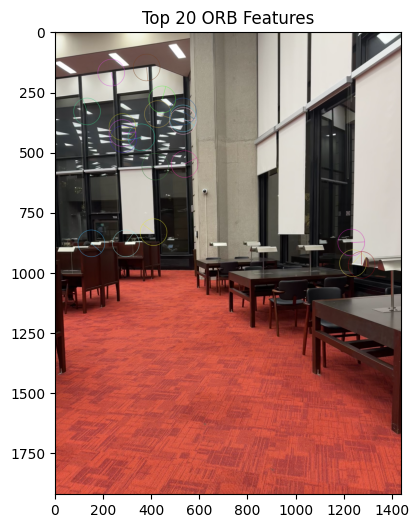

In [17]:
import cv2
import matplotlib.pyplot as plt

# Load your image
# image = cv2.imread('path_to_your_image.jpg')
image = images[0]

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect ORB features and compute descriptors.
keypoints, descriptors = orb.detectAndCompute(image, None)

# Sort keypoints by their size (or Harris response)
keypoints = sorted(keypoints, key=lambda x: -x.size)

# Select the top 20 keypoints
top_keypoints = keypoints[:20]
top_descriptors = descriptors[:20]

# Draw top keypoints on the image
out_image = cv2.drawKeypoints(image, top_keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Convert BGR to RGB for matplotlib display
out_image = cv2.cvtColor(out_image, cv2.COLOR_BGR2RGB)

# Visualize the image with keypoints
plt.figure(figsize=(8, 6))
plt.imshow(out_image)
plt.title('Top 20 ORB Features')
plt.show()


# Install the 3D interactive tools and VS plugin

In [ ]:
!pip install plotly

In [11]:
import plotly.graph_objects as go

# Plotting
trajectory = np.array(trajectory)

# Create a trace of 3D plot for trajectory
trace = go.Scatter3d(
    x=trajectory[:, 0],
    y=trajectory[:, 1],
    z=trajectory[:, 2],
    mode='lines+markers',
    marker=dict(
        size=4,
        color=trajectory[:, 2],  # set color to z-axis values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

# Set the layout of the plot
layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    ),
    title='3D Trajectory of Ego Motion'
)

fig = go.Figure(data=[trace], layout=layout)

# Render the plot
fig.show()

In [6]:
import cv2
import numpy as np
import math
import plotly.graph_objects as go

def extract_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error opening video file")
        return []

    images = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        images.append(frame)

    cap.release()
    return images

def estimate_motion(frame1, frame2, K):
    orb = cv2.ORB_create()
    keypoints1, descriptors1 = orb.detectAndCompute(frame1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(frame2, None)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)

    points1 = np.float32([keypoints1[m.queryIdx].pt for m in matches])
    points2 = np.float32([keypoints2[m.trainIdx].pt for m in matches])

    F, mask = cv2.findFundamentalMat(points1, points2, cv2.FM_RANSAC)
    E = K.T @ F @ K

    _, R, t, _ = cv2.recoverPose(E, points1, points2, K)
    return R, t

def compute_trajectory(images, K):
    trajectory = [np.array([0, 0, 0])]
    R_total = np.eye(3)

    for i in range(len(images) - 1):
        print(f"Processing frame {i + 1}...")
        R, t = estimate_motion(images[i], images[i+1], K)
        R_total = R @ R_total
        t_total = R_total @ t
        trajectory.append(trajectory[-1] + t_total.ravel())

    return trajectory

# Define the path to your video file
video_path = "data_set/my_dataset/videos/ego_motion_test_3.mp4"

# Extract frames from video
images = extract_frames(video_path)
print(f"Total number of frames extracted: {len(images)}")

# Camera intrinsic matrix (as previously defined)
# width = 1920
# height = 1080
# fov_degrees = 60
# fov_radians = math.radians(fov_degrees)
# f = (width / 2) / math.tan(fov_radians / 2)

K = np.array([[1.97547873e+03, 0.00000000e+00, 1.06077279e+03],
 [0.00000000e+00, 2.05341424e+03, 5.13500761e+02],
 [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

# Compute trajectory
trajectory = compute_trajectory(images, K)

# # Visualization using Plotly
# trajectory = np.array(trajectory)
# fig = go.Figure(data=[go.Scatter3d(x=trajectory[:, 0], y=trajectory[:, 1], z=trajectory[:, 2], mode='lines+markers')])
# fig.update_layout(title='Camera Ego Motion Trajectory', scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))
# fig.show()


Total number of frames extracted: 511
Processing frame 1...
Processing frame 2...
Processing frame 3...
Processing frame 4...
Processing frame 5...
Processing frame 6...
Processing frame 7...
Processing frame 8...
Processing frame 9...
Processing frame 10...
Processing frame 11...
Processing frame 12...
Processing frame 13...
Processing frame 14...
Processing frame 15...
Processing frame 16...
Processing frame 17...
Processing frame 18...
Processing frame 19...
Processing frame 20...
Processing frame 21...
Processing frame 22...
Processing frame 23...
Processing frame 24...
Processing frame 25...
Processing frame 26...
Processing frame 27...
Processing frame 28...
Processing frame 29...
Processing frame 30...
Processing frame 31...
Processing frame 32...
Processing frame 33...
Processing frame 34...
Processing frame 35...
Processing frame 36...
Processing frame 37...
Processing frame 38...
Processing frame 39...
Processing frame 40...
Processing frame 41...
Processing frame 42...
Proce

In [7]:
import plotly.graph_objects as go

# Plotting
trajectory = np.array(trajectory)

# Create a trace of 3D plot for trajectory
trace = go.Scatter3d(
    x=trajectory[:, 0],
    y=trajectory[:, 1],
    z=trajectory[:, 2],
    mode='lines+markers',
    marker=dict(
        size=4,
        color=trajectory[:, 2],  # set color to z-axis values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

# Set the layout of the plot
layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    ),
    title='3D Trajectory of Ego Motion'
)

fig = go.Figure(data=[trace], layout=layout)

# Render the plot
fig.show()